In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.08.27']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
915,Afghanistan,22.08.27,191967
1842,Africa,22.08.27,12319935
2757,Albania,22.08.27,328299
3672,Algeria,22.08.27,270175
4581,Andorra,22.08.27,46027
...,...,...,...
208219,Wallis and Futuna,22.08.27,761
209169,World,22.08.27,600466367
210039,Yemen,22.08.27,11925
210932,Zambia,22.08.27,332710


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
915,Afghanistan,22.08.27,191967
2757,Albania,22.08.27,328299
3672,Algeria,22.08.27,270175
4581,Andorra,22.08.27,46027
5472,Angola,22.08.27,102636
...,...,...,...
207541,Vietnam,22.08.27,11401597
208219,Wallis and Futuna,22.08.27,761
210039,Yemen,22.08.27,11925
210932,Zambia,22.08.27,332710


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
200574,United States,22.08.27,94184146
88201,India,22.08.27,44408132
67730,France,22.08.27,34508894
27292,Brazil,22.08.27,34368909
72277,Germany,22.08.27,32041349
199625,United Kingdom,22.08.27,23492875
177867,South Korea,22.08.27,22983818
95542,Italy,22.08.27,21788862
158124,Russia,22.08.27,19077368
97391,Japan,22.08.27,18374230


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
194238,Turkey,22.08.27,16671848
179681,Spain,22.08.27,13332976
144966,Oceania,22.08.27,12096207
207541,Vietnam,22.08.27,11401597
11952,Australia,22.08.27,9997168
...,...,...,...
208219,Wallis and Futuna,22.08.27,761
90043,International,22.08.27,721
205696,Vatican,22.08.27,29
159741,Saint Helena,22.08.27,7


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.08.27', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_19560\1142054896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.08.27', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.08.27,94184146
India,22.08.27,44408132
France,22.08.27,34508894
Brazil,22.08.27,34368909
Germany,22.08.27,32041349
United Kingdom,22.08.27,23492875
South Korea,22.08.27,22983818
Italy,22.08.27,21788862
Russia,22.08.27,19077368


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.08.27,94184146
1,India,22.08.27,44408132
2,France,22.08.27,34508894
3,Brazil,22.08.27,34368909
4,Germany,22.08.27,32041349
5,United Kingdom,22.08.27,23492875
6,South Korea,22.08.27,22983818
7,Italy,22.08.27,21788862
8,Russia,22.08.27,19077368
9,Japan,22.08.27,18374230


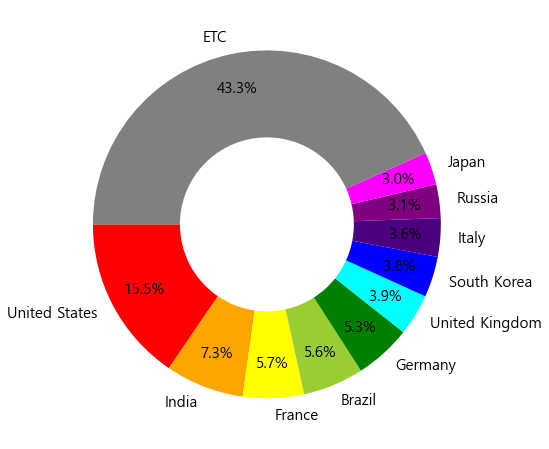

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()